## Customer Segmentation Using K-Means
*I've used Gower Similarity Coefficient over Euclidean Distance because of the presence of cateogorical variables (male, college, and white). At the bottom of this document, I've written some code to show the difference in error between the two methods.*

#### Inspecting the Data
First, we'll read in the data and look it over. This data set is customer data for a women's apparel company, explaining the significant lack of male customers. Our average household income is high and our average age is around 40 years old. Our customer base seems to be predominately white.

In [77]:
library(psych)
library(cluster)
DF_in = read.csv('apparel_cust_data.csv')
describe(DF_in)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
iid,1,1000,5463.2890000,3046.4103478,5430.5000000,5486.4500000,3854.0187000,14.000,10589.000,10575.000,-0.04608814,-1.1665663,96.335953867
spend_online,2,1000,72.4400350,177.1944980,14.9750000,32.6663937,22.2019350,0.000,1985.750,1985.750,5.50323693,40.0565981,5.603382026
spend_retail,3,1000,78.0046450,182.4094687,27.7150000,39.6897063,41.0902590,0.000,2421.905,2421.905,6.12231882,50.7513105,5.768293878
age,4,1000,40.9090000,11.8072067,41.0000000,40.7162500,11.8608000,18.000,88.000,70.000,0.22588619,0.1293582,0.373376659
white,5,1000,0.7993196,0.1959046,0.8550217,0.8330985,0.1461426,0.000,1.000,1.000,-1.67588845,2.9982202,0.006195047
college,6,1000,0.5436606,0.2173147,0.5579942,0.5511063,0.2481765,0.000,1.000,1.000,-0.26898468,-0.8113512,0.006872096
male,7,1000,0.0910000,0.2877530,0.0000000,0.0000000,0.0000000,0.000,1.000,1.000,2.83987287,6.0709518,0.009099550
hh_inc,8,1000,96.2538060,50.1793260,87.3635000,91.2755288,45.2949126,2.499,250.001,247.502,0.95399868,0.8384209,1.586809616


#### Inspecting the Distribution of the Data
Next, we'll look through the distributions of the variables to see if we can hightlight (and eventually fix) any skew. It looks like `online_spend` and `retail_spend` are incredibly right skewed. `white` looks to be fairly left skewed, however it is within such a small range that it should be acceptable for our purposes.

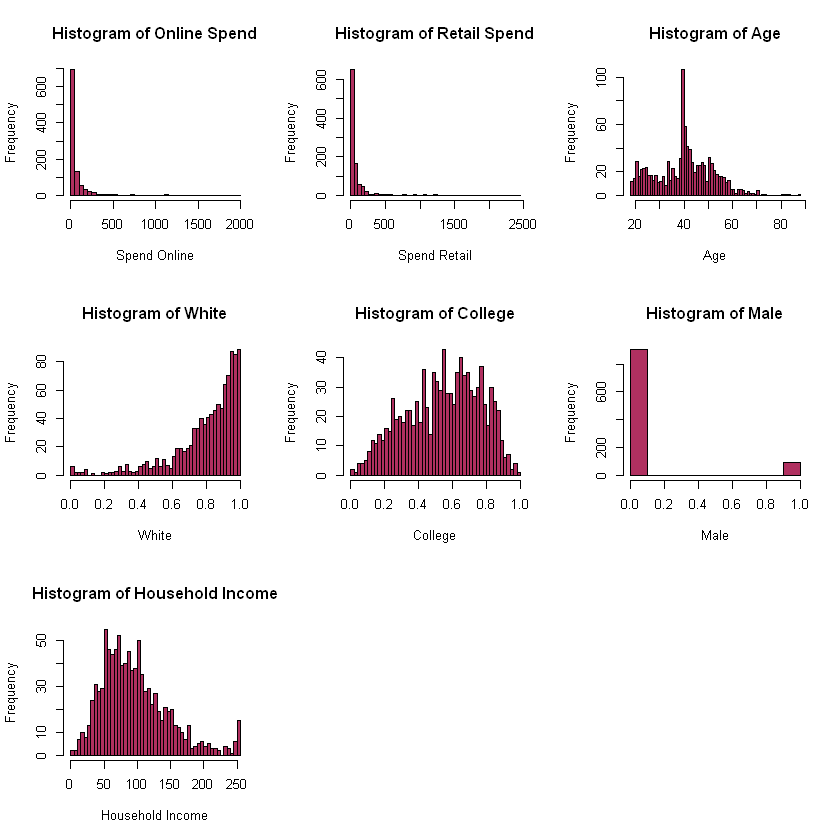

In [76]:
par(mfrow = c(3, 3), cex = 0.65)
nbin = 50
hist(DF_in$spend_online,nbin, xlab = 'Spend Online', main = 'Histogram of Online Spend', col = 'maroon')
hist(DF_in$spend_retail,nbin, xlab = 'Spend Retail', main = 'Histogram of Retail Spend', col = 'maroon')
hist(DF_in$age,nbin, xlab = 'Age', main = 'Histogram of Age', col = 'maroon')
hist(DF_in$white,nbin, xlab = 'White', main = 'Histogram of White', col = 'maroon')
hist(DF_in$college,nbin, xlab = 'College', main = 'Histogram of College', col = 'maroon')
hist(DF_in$male, xlab = 'Male', main = 'Histogram of Male', col = 'maroon')
hist(DF_in$hh_inc,nbin, xlab = 'Household Income', main = 'Histogram of Household Income', col = 'maroon')

#### Fixing Skew
Let's fix the skew on the `spend` variables by using a logarithmic transformation. This fixes the skew as we see the before and after histograms.

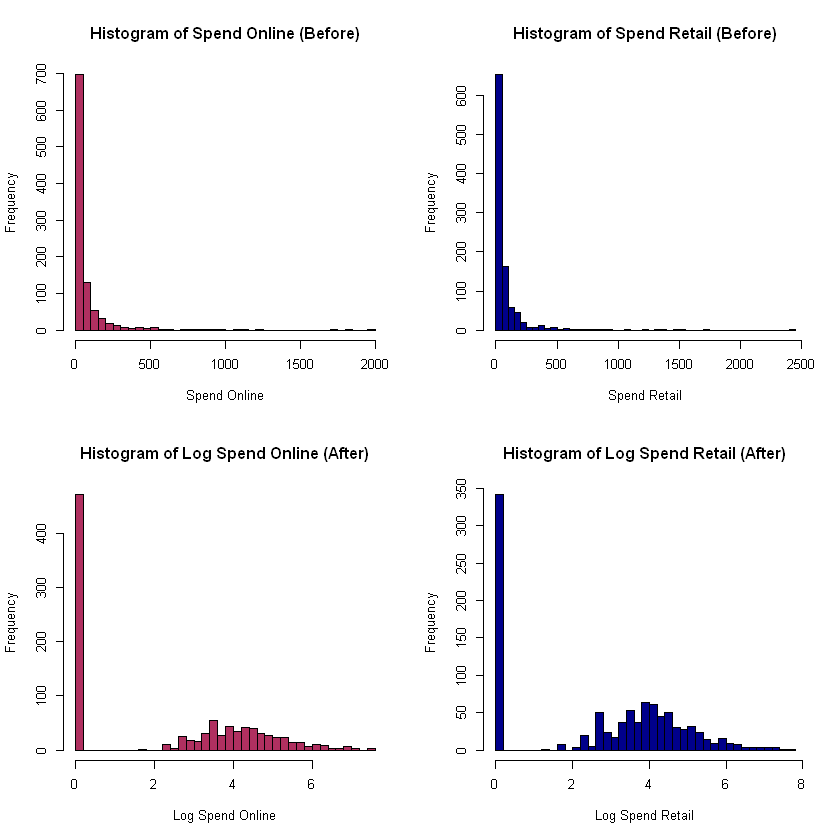

In [59]:
par(mfrow = c(2,2), cex = 0.65)
# log-transform skewed spend variables
DF_in$log_spend_online = log(1+DF_in$spend_online)
DF_in$log_spend_retail = log(1+DF_in$spend_retail)

# histograms
hist(DF_in$spend_online,nbin, xlab = 'Spend Online', main = 'Histogram of Spend Online (Before)', col = 'maroon')
hist(DF_in$spend_retail,nbin, xlab = 'Spend Retail', main = 'Histogram of Spend Retail (Before)', col = 'darkblue')
hist(DF_in$log_spend_online,nbin, xlab = 'Log Spend Online', main = 'Histogram of Log Spend Online (After)', col = 'maroon')
hist(DF_in$log_spend_retail,nbin, xlab = 'Log Spend Retail', main = 'Histogram of Log Spend Retail (After)', col = 'darkblue')

#### Finding the correct number of Clusters
We'll utilize an Elbow Chart to see what number of clusters is appropriate for our analyses. Based on the chart, arguments could be made for K = 3, K = 4, or K = 5

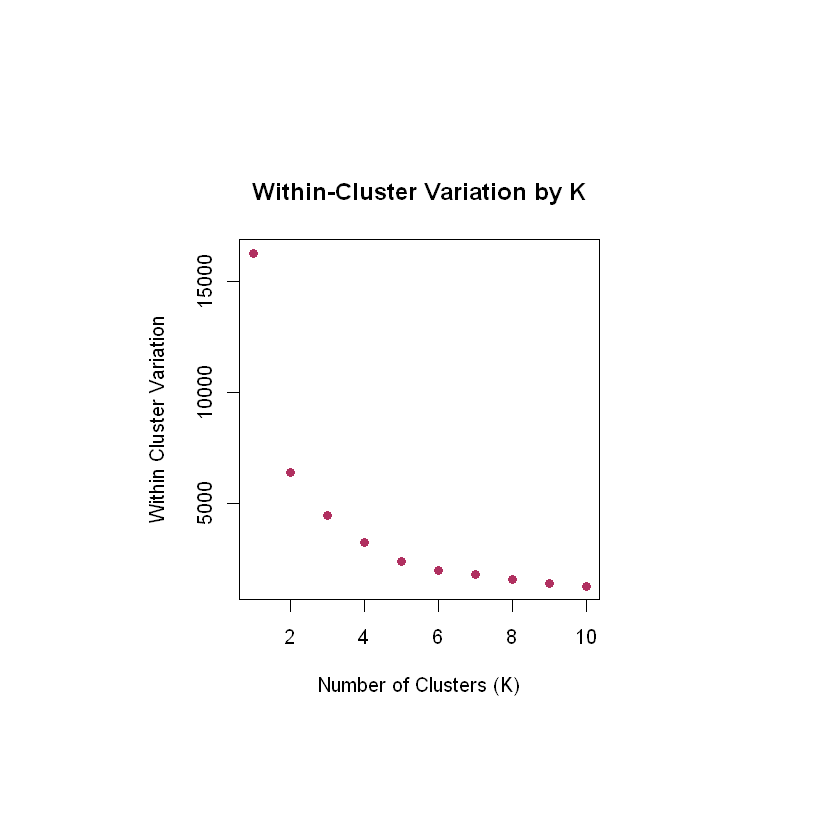

In [74]:
# Create dataframe with transformed variables, omit non-cluster variables
DF = DF_in
DF$iid = NULL
DF$spend_online = NULL
DF$spend_retail = NULL

# Creating a matrix of gower distances
distMat_gower <- daisy(DF, metric = 'gower', warnType = FALSE)

# Iterate to find a correct number of clusters
lst <- rep(1:10)
sslst <- list()
for( i in lst ) {
  clu_gower <- kmeans(distMat_gower, centers = i, nstart = 10)
  ss <- sum(clu_gower$withinss)
  sslst[i] <- ss
}
par(pin = c(3,3))
plot(lst, sslst, xlab = 'Number of Clusters (K)', ylab = 'Within Cluster Variation'
     , main = 'Within-Cluster Variation by K', col = 'maroon', pch = 19)

#### Creating models with different numbers of centroids

In [64]:
# 3 Clusters
clu_gower_3 <- kmeans(distMat_gower, centers = 3, nstart = 10)
DF_in$clu_gower_3 <- clu_gower_3$cluster

# 4 Clusters
clu_gower_4 <- kmeans(distMat_gower, centers = 4, nstart = 10)
DF_in$clu_gower_4 <- clu_gower_4$cluster

# 5 Clusters
clu_gower_5 <- kmeans(distMat_gower, centers = 5, nstart = 10)
DF_in$clu_gower_5 <- clu_gower_5$cluster

#### Inspecting the models

In [66]:
# Find the percentages in each cluster
print('3-Cluster Model')
table(DF_in$clu_gower_3)/dim(DF_in)[1]
# Find the centroids in each cluster
round(aggregate(cbind(spend_online, spend_retail, age, white, college, male, hh_inc) ~ clu_gower_3, data = DF_in, FUN = mean), 3)

# Find the percentages in each cluster
print('4-Cluster Model')
table(DF_in$clu_gower_4)/dim(DF_in)[1]
# Find the centroids in each cluster
round(aggregate(cbind(spend_online, spend_retail, age, white, college, male, hh_inc) ~ clu_gower_4, data = DF_in, FUN = mean), 3)

# Find the percentages in each cluster
print('5-Cluster Model')
table(DF_in$clu_gower_5)/dim(DF_in)[1]
# Find the centroids in each cluster
round(aggregate(cbind(spend_online, spend_retail, age, white, college, male, hh_inc) ~ clu_gower_5, data = DF_in, FUN = mean), 3)

[1] "3-Cluster Model"



    1     2     3 
0.423 0.107 0.470 

clu_gower_3,spend_online,spend_retail,age,white,college,male,hh_inc
1,144.403,59.455,40.189,0.804,0.501,0.00,86.059
2,89.758,83.117,40.505,0.694,0.498,0.85,97.577
3,3.731,93.536,41.649,0.819,0.592,0.00,105.128


[1] "4-Cluster Model"



    1     2     3     4 
0.428 0.167 0.303 0.102 

clu_gower_4,spend_online,spend_retail,age,white,college,male,hh_inc
1,0.023,88.895,41.561,0.816,0.582,0.000,102.475
2,188.384,195.402,40.257,0.820,0.578,0.000,99.215
3,110.368,0.033,40.370,0.795,0.484,0.000,85.082
4,73.808,71.721,40.843,0.710,0.505,0.892,98.485


[1] "5-Cluster Model"



    1     2     3     4     5 
0.100 0.303 0.216 0.216 0.165 

clu_gower_5,spend_online,spend_retail,age,white,college,male,hh_inc
1,75.284,73.031,41.120,0.722,0.509,0.91,99.229
2,110.368,0.033,40.370,0.795,0.484,0.00,85.082
3,0.023,67.223,39.509,0.763,0.425,0.00,66.285
4,0.092,109.311,43.560,0.863,0.737,0.00,138.454
5,190.577,197.335,40.133,0.819,0.578,0.00,98.953


Above, we can see the makeup of each cluster.

#### 3-Cluster Model
Segments 1 and 3 contain a large portion of the customers (42.3% and 47.0% respectively), whereas segment 2 contains a much smaller proportion of the customer base (10.7%). However, this is fine as we see that segment 2 contains the male population of customers, which is very small anyways. I would categorize the segments as the following: 

* Segment 1 (42.3%): (Female, Mixed-Spending) 
* Segment 2 (10.7%): (Male, Mixed-Spending)   
* Segment 3 (47.0%): (Female, Retail-Only)    

#### 4-Cluster Model
By adding a fourth cluster, it would appear that we split the (Female, Mixed-Spending) cluster into two, highlighting female customers that predominately shop online. From a business and marketing perspective, this is far more useful than a 3-cluster model.

* Segment 1 (42.8%): (Female, Retail-Only)    
* Segment 2 (16.7%): (Female, Mixed-Spending) 
* Segment 3 (30.3%): (Female, Online-Only)    
* Segment 4 (10.2%): (Male, Mixed-Spending)

#### 5-Cluster Model
By adding a fifth cluster, it would appear that we have now split the (Female, Retail-Only) cluster into two, highlighting income differences within the cluster. This is also very interesting from a business and marketing perspective, and I would advocate for this 5-cluster model over the 4-cluster and absolutely over the 3-cluster model.

* Segment 1 (10.0%): (Male, Mixed-Spending)   
* Segment 2 (30.3%): (Female, Online-Only)
* Segment 3 (21.6%): (Female, Retail-Only, Lower-Income)
* Segment 4 (21.6%): (Female, Retail-Only, High-Income)
* Segment 5 (16.5%): (Female, Mixed-Spending)

#### Why use Gower over Euclidean?
Gower Similarity Coefficient works better for data with both categorical and continous data, like the data we have here. Below we can see this in action with a comparison of the within-cluster variation.

In [45]:
# Find the percentages in each cluster
table(DF_in$clu_gower_5)/dim(DF_in)[1]
# Find the centroids in each cluster
round(aggregate(cbind(spend_online, spend_retail, age, white, college, male, hh_inc) ~ clu_gower_5, data = DF_in, FUN = mean), 3)


    1     2     3     4     5 
0.303 0.216 0.165 0.100 0.216 

clu_gower_5,spend_online,spend_retail,age,white,college,male,hh_inc
1,110.368,0.033,40.370,0.795,0.484,0.00,85.082
2,0.092,109.311,43.560,0.863,0.737,0.00,138.454
3,190.577,197.335,40.133,0.819,0.578,0.00,98.953
4,75.284,73.031,41.120,0.722,0.509,0.91,99.229
5,0.023,67.223,39.509,0.763,0.425,0.00,66.285


In [73]:
# Creating a matrix using Euclidean distance for 4 centroids
distMat_euclidean <- daisy(DF, metric = 'euclidean', warnType = FALSE)
clu_euclid_4 <- kmeans(distMat_euclidean, centers = 4, nstart = 10)
DF_in$clu_euclid_4 <- clu_euclid_4$cluster

print(c('Euclid: ', sum(clu_euclid_4$withinss)))
print(c('Gower: ',sum(clu_gower_4$withinss)))

[1] "Euclid: "         "204113265.291787"
[1] "Gower: "          "2953.57344321665"
